# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [52]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  
以下任务将考虑从 1950 年 1 月 1 日开始的数据。为此，请创建一个新的 "数据帧"，删除其中 1950 年 1 月 1 日之前的所有行。在后续任务中使用创建的 DataFrame。 

In [53]:
# 将字符串"1950-01-01"转换为datetime对象
# Преобразуйте строку "1950-01-01" в объект "datetime".
start_date = pd.to_datetime("1950-01-01")

# 筛选出1950年1月1日之后的数据
# Отфильтровано для данных после 1 января 1950 года
df_after_1950 = df[df["dt"] >= start_date]

# 查看新DataFrame的前几行，确保筛选正确
# Просмотрите несколько первых строк нового DataFrame
print(df_after_1950.head())

             dt  AverageTemperature  AverageTemperatureUncertainty     City  \
1212 1950-01-01              26.773                          0.239  Abidjan   
1213 1950-02-01              27.527                          0.348  Abidjan   
1214 1950-03-01              28.344                          0.431  Abidjan   
1215 1950-04-01              27.830                          0.467  Abidjan   
1216 1950-05-01              26.896                          0.248  Abidjan   

            Country Latitude Longitude  
1212  Côte D'Ivoire    5.63N     3.23W  
1213  Côte D'Ivoire    5.63N     3.23W  
1214  Côte D'Ivoire    5.63N     3.23W  
1215  Côte D'Ivoire    5.63N     3.23W  
1216  Côte D'Ivoire    5.63N     3.23W  


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.  
在多伦多城绘制年平均温度图。

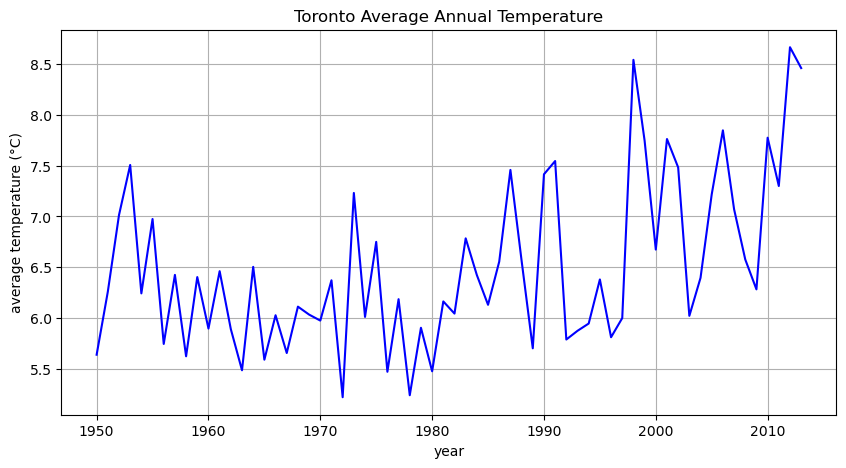

In [54]:
# 确保已经加载了df_after_1950
# 筛选多伦多的数据
# Отбор данных из Торонто
toronto_data = df_after_1950[df_after_1950['City'] == 'Toronto']

# 按年份分组并计算平均温度
# Группировка по годам и вычисление средней температуры
toronto_yearly_avg = toronto_data.groupby(toronto_data['dt'].dt.year)['AverageTemperature'].mean()

# 绘制图表
# Чартинг
plt.figure(figsize=(10, 5))  # 设置图表大小
plt.plot(toronto_yearly_avg, color='blue')  # 绘制年平均温度曲线
plt.title('Toronto Average Annual Temperature')  # 图表标题
plt.xlabel('year')  # X轴标签
plt.ylabel('average temperature (°C)')  # Y轴标签
plt.grid(True)  # 显示网格
plt.show()  # 显示图表


# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна.  
找出给定数据中温度样本方差最大的城市。

In [55]:
# 确保数据已加载到df中
# 1. 按城市分组数据
# 1. Данные сгруппированы по городам
grouped = df_after_1950.groupby('City')

# 2. 计算每个城市的温度样本方差
# 2. Рассчитайте выборочную дисперсию температуры для каждого города
variance_by_city = grouped['AverageTemperature'].var()

# 3. 找出样本方差最大的城市
# 3. Определите город с наибольшей дисперсией выборки
max_variance_city = variance_by_city.idxmax()
max_variance_value = variance_by_city.max()

print("Город с наибольшей дисперсией в выборке температур:", max_variance_city)
print("Выборочное значение дисперсии для города:", max_variance_value)

Город с наибольшей дисперсией в выборке температур: Harbin
Выборочное значение дисперсии для города: 218.898615951821


# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).  
在同一坐标轴上绘制以下图表：  
城市的温度样本方差与其纬度（Latitude）的关系。  
1975年1月城市的平均温度与其纬度（Latitude）的关系。  
1975年7月城市的平均温度与其纬度（Latitude）的关系。  

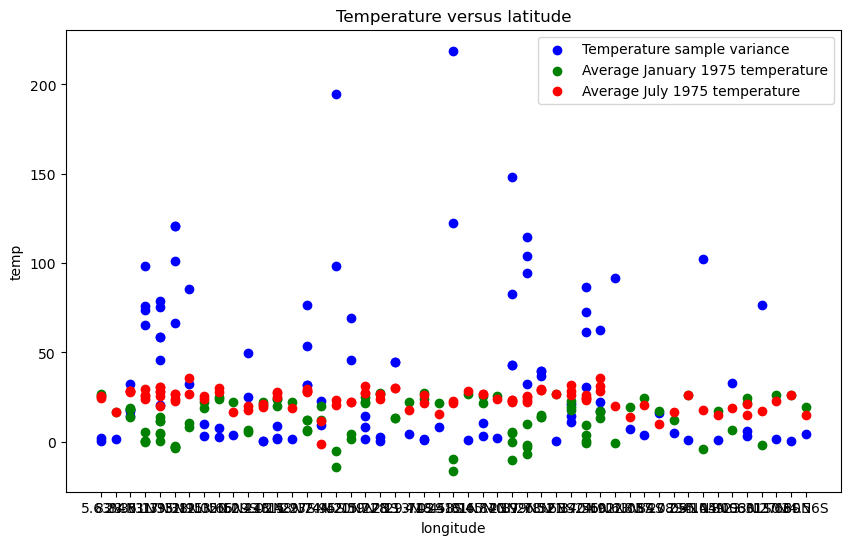

In [56]:
# 计算样本方差
# Рассчитайте выборочную дисперсию
variance_by_city = df_after_1950.groupby('City').agg({'AverageTemperature': 'var', 'Latitude': 'first'})

# 筛选1975年1月和7月的数据
# Скрининг данных за январь и июль 1975 года
jan_1975 = df_after_1950[(df_after_1950['dt'].dt.month == 1) & (df_after_1950['dt'].dt.year == 1975)]
jul_1975 = df_after_1950[(df_after_1950['dt'].dt.month == 7) & (df_after_1950['dt'].dt.year == 1975)]

# 计算1975年1月和7月的平均温度
# Рассчитайте среднюю температуру для января и июля 1975 года
avg_temp_jan_1975 = jan_1975.groupby('City').agg({'AverageTemperature': 'mean', 'Latitude': 'first'})
avg_temp_jul_1975 = jul_1975.groupby('City').agg({'AverageTemperature': 'mean', 'Latitude': 'first'})

# 绘制图表
# Чартинг
plt.figure(figsize=(10, 6))

# 温度样本方差与纬度的关系
# Дисперсия выборки температуры в зависимости от широты
plt.scatter(variance_by_city['Latitude'], variance_by_city['AverageTemperature'], color='blue', label='Temperature sample variance')

# 1975年1月平均温度与纬度的关系
# Средняя температура января 1975 года в зависимости от широты
plt.scatter(avg_temp_jan_1975['Latitude'], avg_temp_jan_1975['AverageTemperature'], color='green', label='Average January 1975 temperature')

# 1975年7月平均温度与纬度的关系
# Средняя температура июля 1975 года в зависимости от широты
plt.scatter(avg_temp_jul_1975['Latitude'], avg_temp_jul_1975['AverageTemperature'], color='red', label='Average July 1975 temperature')

plt.title('Temperature versus latitude')
plt.xlabel('longitude')
plt.ylabel('temp')
plt.legend()
plt.show()

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике.   
计算圣彼得堡的年平均温度数据。确定哪些年份的平均温度高于前一年和后一年。在年平均温度图上以任意方式标记这些年份。

构建一个线性回归模型（可以使用LinearRegression）: 
年份→年平均温度在之前的图表上显示这条线。

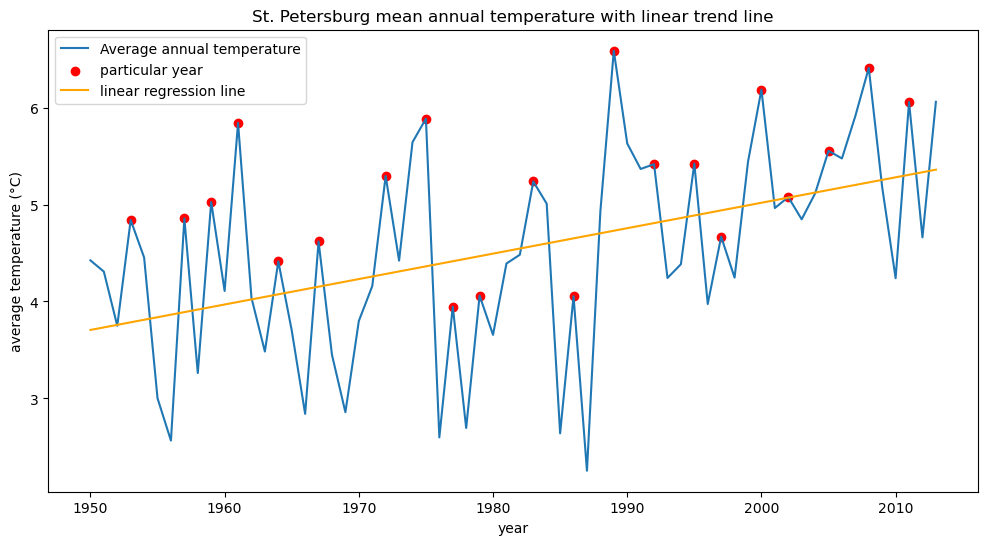

In [57]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 确保数据已加载到df中
# 计算圣彼得堡的年平均温度
# Вычислите среднегодовую температуру в Санкт-Петербурге
spb_data = df_after_1950[df_after_1950['City'] == 'Saint Petersburg']
spb_yearly_avg = spb_data.groupby(spb_data['dt'].dt.year)['AverageTemperature'].mean()

# 使用平均值替代 NaN 值
# Используйте среднее значение вместо значения NaN
mean_temp = spb_yearly_avg.mean()
spb_yearly_avg.fillna(mean_temp, inplace=True)

# 确定特定年份
# Определите конкретные годы
years = spb_yearly_avg.index
higher_years = [year for i, year in enumerate(years[1:-1]) if spb_yearly_avg.iloc[i] < spb_yearly_avg.iloc[i + 1] > spb_yearly_avg.iloc[i + 2]]

# 准备数据以进行线性回归
# Подготовьте данные для линейной регрессии
X = np.array(years).reshape(-1, 1)  # 年份
y = spb_yearly_avg.values  # 年平均温度

# 拟合线性回归模型
# Модели линейной регрессии
model = LinearRegression().fit(X, y)
trend_line = model.predict(X)

# 绘图
# Рисунок
plt.figure(figsize=(12, 6))
plt.plot(years, y, label='Average annual temperature')
plt.scatter(higher_years, spb_yearly_avg.loc[higher_years], color='red', label='particular year')  # 标记特定年份
plt.plot(years, trend_line, label='linear regression line', color='orange')
plt.title('St. Petersburg mean annual temperature with linear trend line')
plt.xlabel('year')
plt.ylabel('average temperature (°C)')
plt.legend()
plt.show()


# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.  
找出下列城市   
1. 样本中年平均气温的最大值与最小值之差最大。  
2. 1 月平均气温与 7 月平均气温的平均差最大。  
3. 平均每年出现负温度的月份数最多。  

In [58]:
# 确保数据已加载到df中
# 计算每个城市的年平均温度
# Рассчитайте среднегодовую температуру для каждого города
yearly_avg_temp = df_after_1950.groupby(['City', df_after_1950['dt'].dt.year])['AverageTemperature'].mean().reset_index(name='YearlyAvgTemp')

# Города с наибольшей разницей годовых температур
# 最大年温差城市
temp_range = yearly_avg_temp.groupby('City')['YearlyAvgTemp'].agg(max_temp=('max'), min_temp=('min'))
temp_range['range'] = temp_range['max_temp'] - temp_range['min_temp']
city_max_range = temp_range['range'].idxmax()

# 最大1月与7月温差城市
# Города с наибольшей разницей температур между январем и июлем
jan_temp = df_after_1950[df_after_1950['dt'].dt.month == 1].groupby('City')['AverageTemperature'].mean()
jul_temp = df_after_1950[df_after_1950['dt'].dt.month == 7].groupby('City')['AverageTemperature'].mean()
diff_temp = (jul_temp - jan_temp).abs()
city_max_diff = diff_temp.idxmax()

# 平均负温度月份最多的城市
# Города с наибольшим количеством месяцев со средней отрицательной температурой
negative_months = df_after_1950[df_after_1950['AverageTemperature'] < 0].groupby(['City', df_after_1950['dt'].dt.year])['dt'].nunique()
avg_negative_months = negative_months.groupby('City').mean()
city_most_neg_months = avg_negative_months.idxmax()

print("Города с наибольшей разницей годовых температур:", city_max_range)
print("Города с наибольшей разницей температур между январем и июлем:", city_max_diff)
print("Города с наибольшим количеством месяцев со средней отрицательной температурой:", city_most_neg_months)


Города с наибольшей разницей годовых температур: Mashhad
Города с наибольшей разницей температур между январем и июлем: Harbin
Города с наибольшим количеством месяцев со средней отрицательной температурой: Harbin


# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 

在地图上显示城市，例如使用 [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) 或 [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html)。标签的颜色应与过去 10 年 1 月的平均气温相对应。

**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой.   

**/****（+3 分）。计算 1950-2013 年间每个城市每年平均气温变化的 "趋势 "直线（您可以使用任务 **3.5**中的线性回归方法）。根据直线的斜率用不同颜色显示城市。

**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента.   
**\***(+1 点) 除上一点外，使用 [pwlf](https://pypi.org/project/pwlf/)库中的固定段数，并可视化最后一段的角度。

In [66]:
import pandas as pd
import plotly.express as px
import numpy as np


def dms2dd(dms):
    # 分离数值和方向
    # Разделите ценности и направления
    if isinstance(dms, str):
        num, direction = float(dms[:-1]), dms[-1]
        # 根据方向调整符号
        # Настройте символы в соответствии с направлением
        if direction in ['S', 'W']:
            num *= -1
        return num
    else:
        # 如果已经是数值类型，则直接返回
        return dms

# 创建 df_after_1950 的副本以避免 SettingWithCopyWarning
# создайте копию df_after_1950, чтобы избежать предупреждения SettingWithCopyWarning
df_after_1950 = df_after_1950.copy()

# 应用转换函数到纬度和经度列
# Примените функции преобразования к столбцам широты и долготы
df_after_1950['Latitude'] = df_after_1950['Latitude'].apply(dms2dd)
df_after_1950['Longitude'] = df_after_1950['Longitude'].apply(dms2dd)

# 处理 NaN 值，仅对数值列计算平均值
# обрабатываются значения NaN, средние значения рассчитываются только для числовых столбцов
numeric_cols = df_after_1950.select_dtypes(include=[np.number]).columns
df_after_1950[numeric_cols] = df_after_1950[numeric_cols].fillna(df_after_1950[numeric_cols].mean())

# 计算过去10年每个城市1月的平均温度
# Рассчитайте среднюю температуру января для каждого города за последние 10 лет
current_year = df_after_1950['dt'].dt.year.max()
jan_temps = df_after_1950[(df_after_1950['dt'].dt.month == 1) & (df_after_1950['dt'].dt.year > current_year - 10)]
avg_jan_temps = jan_temps.groupby('City', as_index=False).agg({'AverageTemperature': 'mean', 'Latitude': 'first', 'Longitude': 'first'})

# 使用 Plotly Express 在地图上显示城市
# Используйте Plotly Express для отображения городов на карте
fig = px.scatter_geo(avg_jan_temps,
                     lat='Latitude',
                     lon='Longitude',
                     color='AverageTemperature',
                     color_continuous_scale=px.colors.sequential.Plasma,
                     range_color=[avg_jan_temps['AverageTemperature'].min(), avg_jan_temps['AverageTemperature'].max()],
                     hover_name='City',
                     projection="natural earth",
                     title='过去10年1月平均温度')
fig.show()